# First glance at the data

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [29]:
# Load the Excel file
file_path = '/home/leo/Documents/These/Données/Rearangement_OB2.xlsx'  # Replace with the path to your file
df = pd.read_excel(file_path)

/home/leo/micromamba/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


The focus is on the two aedes species present on the island

In [30]:
# Filter rows where 'species' column is equal to 'ae_poly'
Poly_df = df[(df['Spc'] == 'ae_poly') & (df['Motu'] == 'Onetahi')]
Aegipty_df = df[(df['Spc'] == 'ae_aeg') & (df['Motu'] == 'Onetahi')]

There's a first cleanup to do on the dates values. We'll convert them to datetime objects and check for missing values.

In [31]:
# Ensure 'Date' column is in datetime format
Poly_df['Date'][:-82] = pd.to_datetime(Poly_df['Date'][:-82])
Aegipty_df['Date'][:-80] = pd.to_datetime(Aegipty_df['Date'][:-80])

# Convert month names to month numbers
month_map = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12
}

date_poly = pd.DataFrame({
    'Day': Poly_df['Date'][-82:].values,
    'Month': Poly_df['Month'][-82:].map(month_map).values,
    'Year': [2024] * 82
})
date_aeg = pd.DataFrame({
    'Day': Aegipty_df['Date'][-80:].values,
    'Month': Aegipty_df['Month'][-80:].map(month_map).values,
    'Year': [2023] * 80
})
#date_aeg[['Year', 'Month', 'Day']]

Poly_df['Date'][-82:] = pd.to_datetime(date_poly[['Year', 'Month', 'Day']])
Aegipty_df['Date'][-80:] = pd.to_datetime(date_aeg[['Year', 'Month', 'Day']])

/tmp/ipykernel_16659/1398771342.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  Poly_df['Date'][:-82] = pd.to_datetime(Poly_df['Date'][:-82])
/tmp/ipykernel_16659/1398771342.py:2: SettingWithCopyWarning: 
A value is trying to be set on a

We now have to handle the Nan values. They are for now removed from the file (most of them are from Covid I think).

In [32]:
# Split the dataset based on the 'action' column
df_poly_r = Poly_df[Poly_df['Action'] == 'Release']  # Rows where 'action' is 'R'
df_poly_c = Poly_df[Poly_df['Action'] == 'Capture']  # Rows where 'action' is 'C'

df_aegipty_c = Aegipty_df[Aegipty_df['Action'] == 'Capture']  # Rows where 'action' is 'R'

#df_r.fillna(0, inplace=True)
#df_c.fillna(0, inplace=True)
# Instead of replacing Na with 0, you can also drop rows with Na values
df_poly_r.dropna(subset=['Nb_ind'], inplace=True)
df_poly_c['Nb_ind'].replace('NA ', np.nan, inplace=True)
df_poly_c.dropna(subset=['Nb_ind'], inplace=True)
df_poly_c.dropna(subset=['Date'], inplace=True)

df_aegipty_c['Nb_ind'].replace('NA ', np.nan, inplace=True)
df_aegipty_c.dropna(subset=['Nb_ind'], inplace=True)
df_aegipty_c.dropna(subset=['Date'], inplace=True)


/tmp/ipykernel_16659/3876062033.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_poly_r.dropna(subset=['Nb_ind'], inplace=True)
/tmp/ipykernel_16659/3876062033.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_poly_c['Nb_ind'].replace('NA ', np.nan, inplace=True)
/tmp/ipykernel_16659/3876062033.py:11: FutureWarning: Downcasting be

In [33]:

# Optionally, save the filtered data to a new csv file
#df_poly_r.to_csv('../Data/df_poly_release.csv', index=False)
#df_poly_c.to_csv('../Data/df_poly_capture.csv', index=False)
#df_aegipty_c.to_csv('../Data/df_aegipty_cature.csv', index=False)

More info on the number of captured and released mosquitoes

In [34]:
# Get the numbre of mosquitoes released and captured 
nb_poly_mosquitoes_released = df_poly_r['Nb_ind'].sum()
nb_poly_mosquitoes_captured = df_poly_c['Nb_ind'].sum()
nb_aegipty_mosquitoes_captured = df_aegipty_c['Nb_ind'].sum()

print(f"Number of Ae. aegypti mosquitoes captured: {nb_aegipty_mosquitoes_captured}")
print(f"Number of Ae. polynesiensis mosquitoes captured: {nb_poly_mosquitoes_captured}")
print(f"Number of Ae. polynesiensis mosquitoes released: {nb_poly_mosquitoes_released}")

Number of Ae. aegypti mosquitoes captured: 3406.0
Number of Ae. polynesiensis mosquitoes captured: 23048.0
Number of Ae. polynesiensis mosquitoes released: 6853590


In [35]:
df_poly_c[df_poly_c['Phase'] == 3]

KeyError: 'Phase'

/tmp/ipykernel_8423/3172884022.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_poly_r['Phase'] = 0
/tmp/ipykernel_8423/3172884022.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_poly_c['Phase'] = 0
/tmp/ipykernel_8423/3172884022.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retur

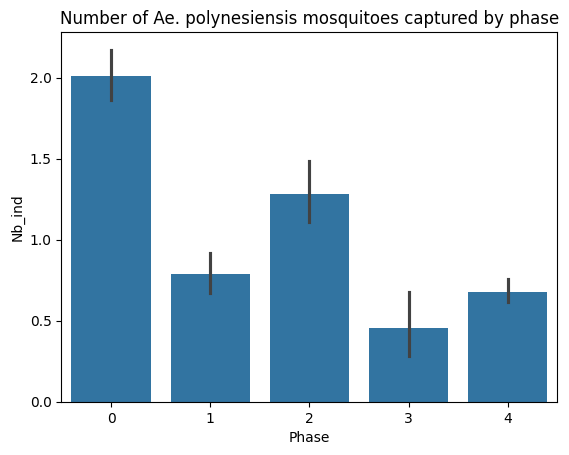

In [ ]:
# Add a new variable in the df_poly_* : phase ! The phase 0 is the dates before the release of the mosquitoes (2018-10-17). The second is between this date and 2019-11-13. The 3rd is between 2019-11-13 and 2021-08-03. The 4th is from 2022-09-23. The last from 2022-10-09 to the end 
df_poly_r['Phase'] = 0
df_poly_c['Phase'] = 0

# Convert string dates to datetime objects
release_dates = [
	pd.to_datetime('2018-10-16'),
	pd.to_datetime('2019-11-13'),
	pd.to_datetime('2021-08-04'),
	pd.to_datetime('2022-09-22'),
	pd.to_datetime('2022-10-08')
]

df_poly_r['Phase'] = np.where(df_poly_r['Date'] > release_dates[0], 1, 0)
df_poly_c['Phase'] = np.where(df_poly_c['Date'] > release_dates[0], 1, 0)

df_poly_r['Phase'] = np.where(df_poly_r['Date'] > release_dates[1], 2, df_poly_r['Phase'])
df_poly_c['Phase'] = np.where(df_poly_c['Date'] > release_dates[1], 2, df_poly_c['Phase'])

df_poly_r['Phase'] = np.where(df_poly_r['Date'] > release_dates[2], 'Covid', df_poly_r['Phase'])
df_poly_c['Phase'] = np.where(df_poly_c['Date'] > release_dates[2], 'Covid', df_poly_c['Phase'])

df_poly_r['Phase'] = np.where(df_poly_r['Date'] > release_dates[3], 3, df_poly_r['Phase'])
df_poly_c['Phase'] = np.where(df_poly_c['Date'] > release_dates[3], 3, df_poly_c['Phase'])

df_poly_r['Phase'] = np.where(df_poly_r['Date'] > release_dates[4], 4, df_poly_r['Phase'])
df_poly_c['Phase'] = np.where(df_poly_c['Date'] > release_dates[4], 4, df_poly_c['Phase'])

# Plot the number of mosquitoes captured by phase
fig, ax = plt.subplots()
sns.barplot(x='Phase', y='Nb_ind', data=df_poly_c, ax=ax)
ax.set_title('Number of Ae. polynesiensis mosquitoes captured by phase')
plt.show()

In [46]:

# For phase 1 and 4, i want the number of mosquitoes captured by week and released by week 
df_poly_c['Week'] = df_poly_c['Date'].dt.isocalendar().week
df_poly_r['Week'] = df_poly_r['Date'].dt.isocalendar().week

# Plot the number of mosquitoes captured by week
fig, ax = plt.subplots()
sns.barplot(x='Week', y='Nb_ind', data=df_poly_c[df_poly_c['Phase'] == 1], ax=ax)
ax.set_title('Number of Ae. polynesiensis mosquitoes captured by week (Phase 1)')
plt.show()

AttributeError: Can only use .dt accessor with datetimelike values

plots are great to have a better understanding. We can clearly see the impact of covid, and the change in the trap type after covid.

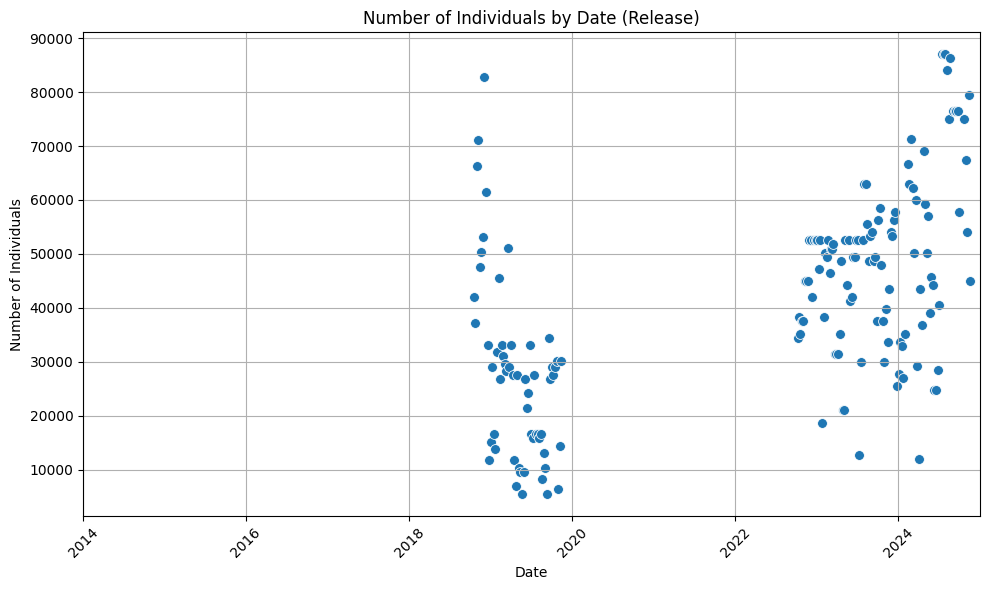

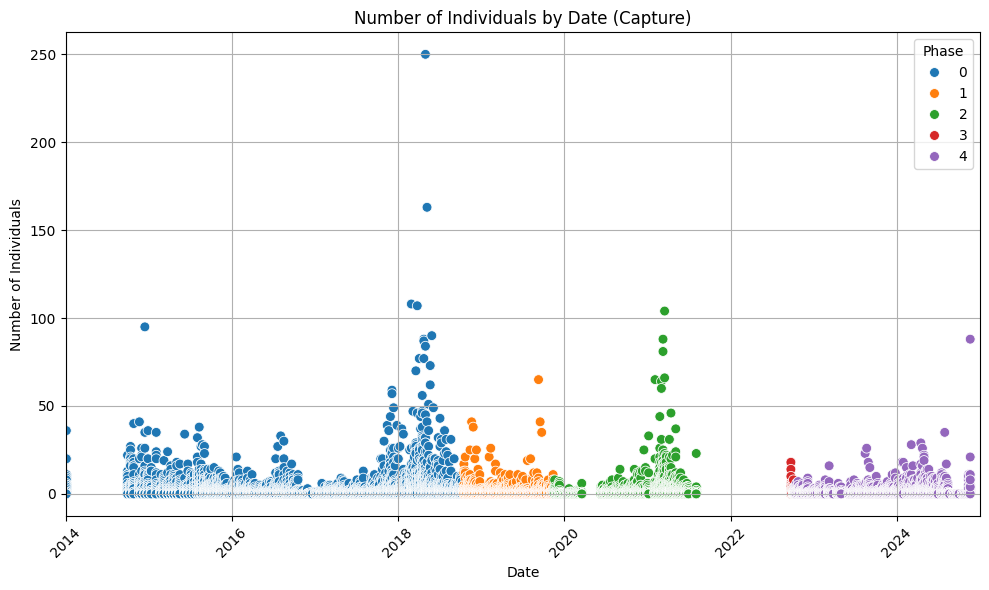

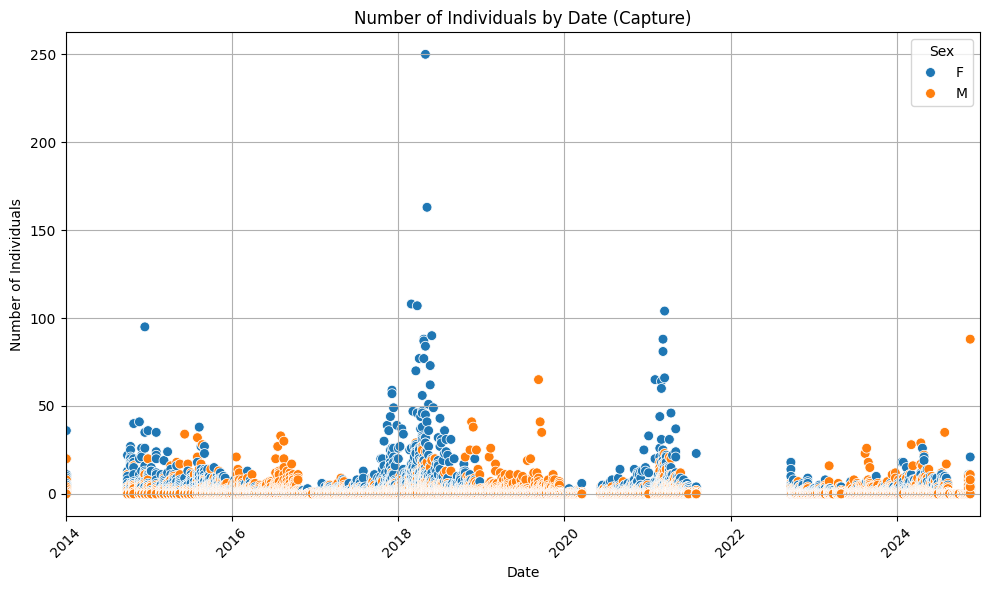

In [52]:
# Make a seaborn histogram the data for Release events 
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_poly_r, x='Date', y='Nb_ind', s=50)
plt.title('Number of Individuals by Date (Release)')
plt.xlabel('Date')
plt.xlim(pd.to_datetime('2014-01-01'), pd.to_datetime('2025-01-01'))
plt.ylabel('Number of Individuals')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
#plt.savefig('../img/release_plot.png')
plt.show()

# Plot a double plot for the data for Capture events of poly depending on trap type.

sex_palette = {'M': 'orange', 'F': 'blue'} 

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_poly_c, x='Date', y='Nb_ind', hue='Phase', s=50)
plt.title('Number of Individuals by Date (Capture)')
plt.xlabel('Date')
plt.xlim(pd.to_datetime('2014-01-01'), pd.to_datetime('2025-01-01'))
plt.ylabel('Number of Individuals')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
#plt.savefig('../img/capture_plot_poly.png')
plt.show()

# Plot the data for Capture events
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_poly_c, x='Date', y='Nb_ind', hue='Sex', s=50)
plt.title('Number of Individuals by Date (Capture)')
plt.xlabel('Date')
plt.xlim(pd.to_datetime('2014-01-01'), pd.to_datetime('2025-01-01'))
plt.ylabel('Number of Individuals')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
#plt.savefig('../img/capture_plot_poly.png')
plt.show()

# Save each plot to a file


# Meteo

In [50]:
#open the meteo data, the values are separated by ;

meteo_path = '/home/leo/Documents/These/Données/Meteo/Q_987_previous-1950-2023_RR-T-Vent.csv'
meteo_df = pd.read_csv(meteo_path, sep=';')
# Print the column names to check if they match
print(meteo_df.columns)

# size of meteo_df
print(meteo_df.shape)

Index(['NUM_POSTE', 'NOM_USUEL', 'LAT', 'LON', 'ALTI', 'AAAAMMJJ', 'RR', 'QRR',
       'TN', 'QTN', 'HTN', 'QHTN', 'TX', 'QTX', 'HTX', 'QHTX', 'TM', 'QTM',
       'TNTXM', 'QTNTXM', 'TAMPLI', 'QTAMPLI', 'TNSOL', 'QTNSOL', 'TN50',
       'QTN50', 'DG', 'QDG', 'FFM', 'QFFM', 'FF2M', 'QFF2M', 'FXY', 'QFXY',
       'DXY', 'QDXY', 'HXY', 'QHXY', 'FXI', 'QFXI', 'DXI', 'QDXI', 'HXI',
       'QHXI', 'FXI2', 'QFXI2', 'DXI2', 'QDXI2', 'HXI2', 'QHXI2', 'FXI3S',
       'QFXI3S', 'DXI3S', 'QDXI3S', 'HXI3S', 'QHXI3S', 'DRR', 'QDRR'],
      dtype='object')
(1911640, 58)


In [51]:
# Keep only the AAAAMMJJ, RR, TX, TM and FXI2 columns
meteo_df = meteo_df[['AAAAMMJJ', 'RR', 'TX', 'TM', 'FXI2', 'TN', 'TN50']]

# Convert the 'AAAAMMJJ' column to datetime format and remove all values where the date is before 2014-01-01
meteo_df['AAAAMMJJ'] = pd.to_datetime(meteo_df['AAAAMMJJ'], format='%Y%m%d')
meteo_df = meteo_df[meteo_df['AAAAMMJJ'] >= pd.to_datetime('2014-01-01')]

In [52]:
meteo_df.head()

,AAAAMMJJ,RR,TX,TM,FXI2,TN,TN50
292,2014-01-01,14.1,30.5,28.0,NaN,26.8,NaN
293,2014-01-02,0.0,28.8,26.5,NaN,23.1,NaN
294,2014-01-03,27.3,29.0,25.4,NaN,22.4,NaN
295,2014-01-04,0.0,29.5,27.2,NaN,25.0,NaN
296,2014-01-05,0.0,30.2,28.1,NaN,25.8,NaN


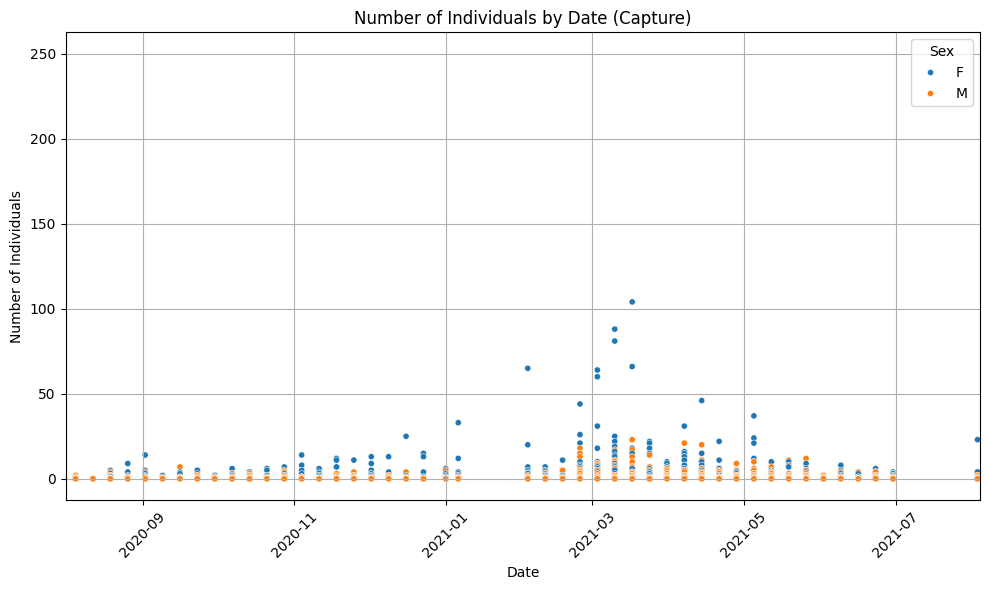

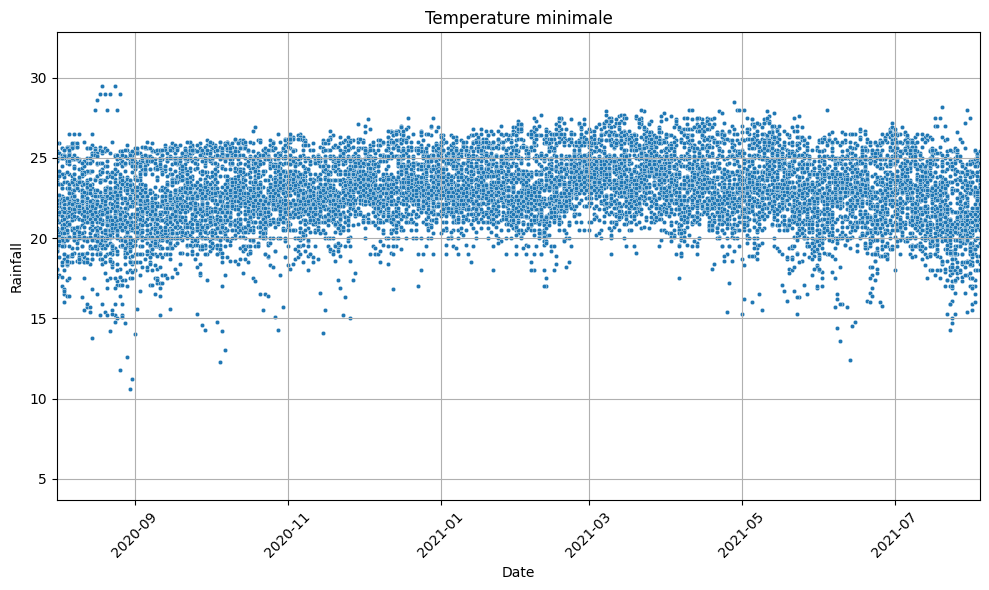

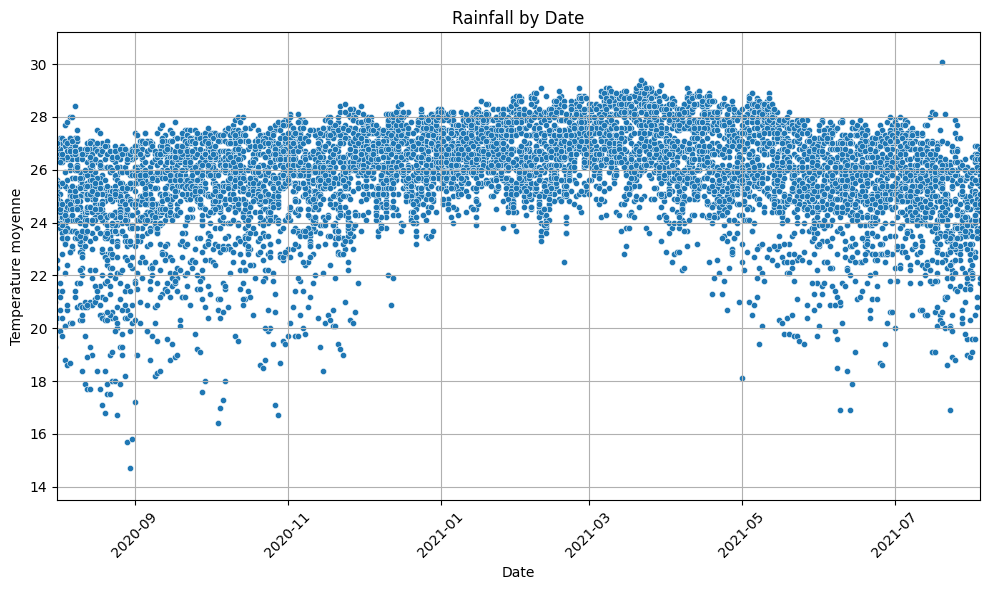

In [53]:
#plot RR depending on the AAAAMMJJ the same way as before 
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_poly_c, x='Date', y='Nb_ind', hue='Sex', s=20)
plt.title('Number of Individuals by Date (Capture)')
plt.xlabel('Date')
plt.xlim(pd.to_datetime('2020-08-01'), pd.to_datetime('2021-08-04'))
plt.ylabel('Number of Individuals')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
#plt.savefig('../img/capture_plot_poly.png')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=meteo_df, x='AAAAMMJJ', y='TN', s=10)
plt.title('Temperature minimale')
plt.xlabel('Date')
plt.xlim(pd.to_datetime('2020-08-01'), pd.to_datetime('2021-08-04'))
plt.ylabel('Rainfall')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
#plt.savefig('../img/rainfall_plot.png')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=meteo_df, x='AAAAMMJJ', y='TM', s=20)
plt.title('Rainfall by Date')
plt.xlabel('Date')
plt.xlim(pd.to_datetime('2020-08-01'), pd.to_datetime('2021-08-04'))
plt.ylabel('Temperature moyenne')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
#plt.savefig('../img/rainfall_plot.png')
plt.show()


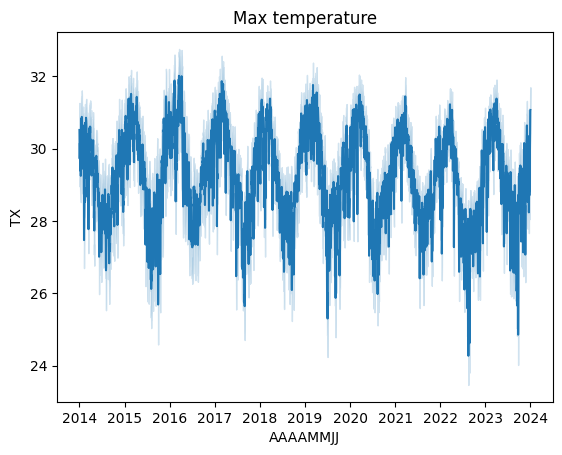

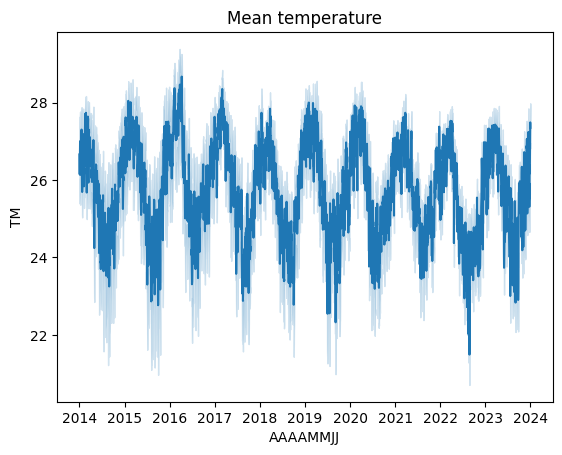

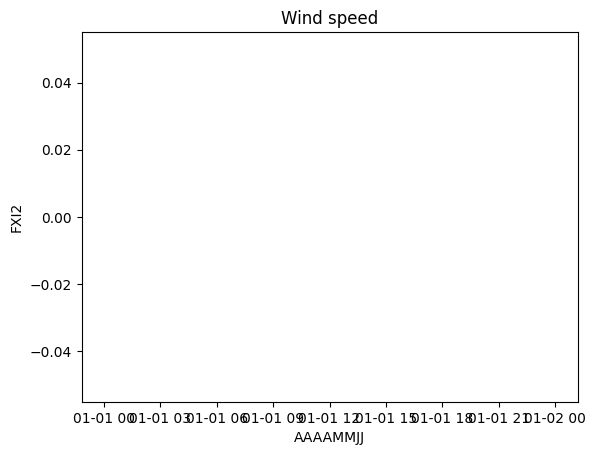

In [54]:
fig, ax = plt.subplots()
sns.lineplot(x='AAAAMMJJ', y='TX', data=meteo_df, ax=ax)
ax.set_title('Max temperature')
plt.show()

fig, ax = plt.subplots()
sns.lineplot(x='AAAAMMJJ', y='TM', data=meteo_df, ax=ax)
ax.set_title('Mean temperature')
plt.show()

fig, ax = plt.subplots()
sns.lineplot(x='AAAAMMJJ', y='FXI2', data=meteo_df, ax=ax)
ax.set_title('Wind speed')
plt.show()